## Importing libs

In [78]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize import categorical_eda, timeseries_eda, continous_eda
sns.set(style = 'whitegrid')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [2]:
df_raw = pd.read_csv('../data/interim/attr_added/ecregistration.csv')

E:\Gokul\Anaconda\envs\mldev\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,12,20,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_raw.head()

,id,state,district,poverty_line,case_no,caste,registration_date,mother_deleted,mother_deleted_time,female_child_born,...,wife_current_age,wife_marry_age,young_child_age_month,young_child_age_year,young_child_gender,hus_current_age,hus_marry_age,isactive,previous_status,created_on
0,1,Haryana,Panchkula,Not known,2.0,SC,2018-04-09 00:00:00,No,NaN,0.0,...,25.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
1,2,Haryana,Panchkula,Not known,2.0,SC,2018-04-02 00:00:00,No,NaN,0.0,...,26.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
2,3,Haryana,Panchkula,Not known,2.0,SC,2018-04-09 00:00:00,No,NaN,0.0,...,30.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
3,4,Haryana,Panchkula,Not known,2.0,Other,2018-04-09 00:00:00,No,NaN,0.0,...,28.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
4,5,Haryana,Panchkula,Not known,2.0,Other,2018-04-09 00:00:00,No,NaN,0.0,...,32.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741979 entries, 0 to 1741978
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

In [5]:
df_raw.tail()

,id,state,district,poverty_line,case_no,caste,registration_date,mother_deleted,mother_deleted_time,female_child_born,...,wife_current_age,wife_marry_age,young_child_age_month,young_child_age_year,young_child_gender,hus_current_age,hus_marry_age,isactive,previous_status,created_on
1741974,1741975,Haryana,Panchkula,APL,2.0,Other,2019-12-12 00:00:00,No,NaN,0.0,...,20.0,18.0,0.0,0.0,0,NaN,NaN,NaN,NaN,2020-05-30 11:41:59
1741975,1741976,Haryana,Kaithal,APL,1.0,Other,2019-08-16 00:00:00,No,NaN,0.0,...,21.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-13 13:46:00
1741976,1741977,Haryana,Kaithal,APL,1.0,Other,2019-05-15 00:00:00,No,NaN,0.0,...,21.0,21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-17 12:01:00
1741977,1741978,Haryana,Karnal,APL,2.0,Other,2019-08-07 00:00:00,No,NaN,1.0,...,36.0,21.0,0.0,6.0,F,NaN,NaN,NaN,NaN,2020-05-26 13:49:13
1741978,\.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_raw.iloc[:-1, :].copy()

## EDA

### id

In [7]:
df['id'].nunique()

1741978

### state

Unique values: ['Haryana']
No. of unique values: 1
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Haryana    100.0
Name: state, dtype: float64


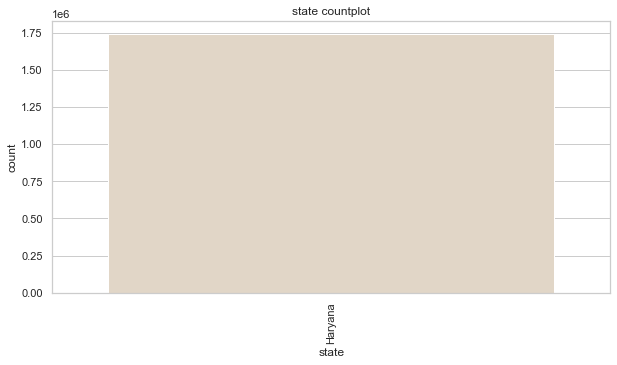

In [8]:
categorical_eda(df, 'state', (10, 5))

### district

Unique values: ['Panchkula' 'Mewat' 'Palwal' 'Yamunanagar' 'Ambala' 'Mahendragarh'
 'Karnal' 'Gurgaon' 'Hisar' 'Jind' 'Sirsa' 'Kaithal']
No. of unique values: 12
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Karnal          14.037261
Jind            13.521239
Hisar           13.231510
Yamunanagar     11.369317
Kaithal          9.811720
Sirsa            8.207853
Ambala           8.207164
Mewat            7.327417
Gurgaon          3.992358
Mahendragarh     3.555613
Panchkula        3.436266
Palwal           3.302281
Name: district, dtype: float64


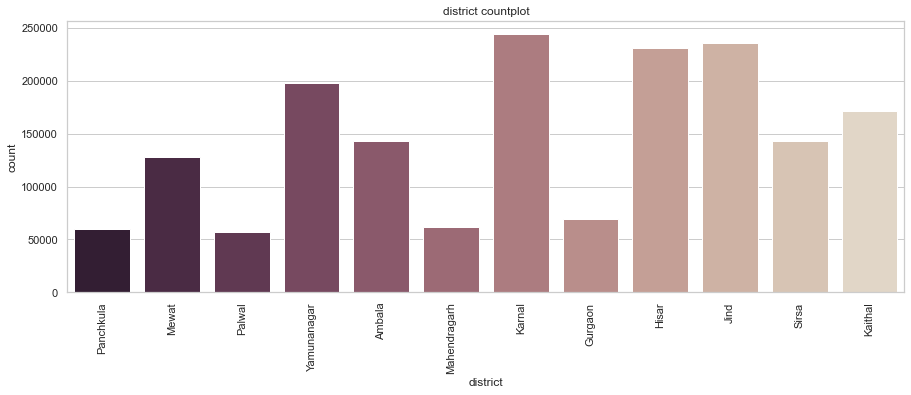

In [9]:
categorical_eda(df, 'district', (15, 5))

### poverty_line

Unique values: ['Not known' 'APL' 'BPL']
No. of unique values: 3
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
APL          48.818010
Not known    37.124235
BPL          14.057755
Name: poverty_line, dtype: float64


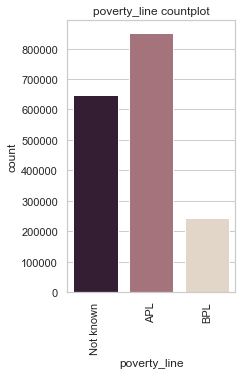

In [10]:
categorical_eda(df, 'poverty_line', (3, 5))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741978 entries, 0 to 1741977
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

### case_no

Unique values: [2. 1. 3. 4. 5.]
No. of unique values: 5
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
1.0    56.353008
2.0    43.059786
3.0     0.563842
4.0     0.022044
5.0     0.001320
Name: case_no, dtype: float64


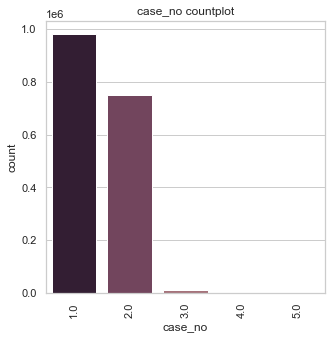

In [12]:
categorical_eda(df, 'case_no', (5, 5))

### caste

Unique values: ['SC' 'Other' 'Not known' 'ST']
No. of unique values: 4
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Other        71.465311
SC           23.809658
Not known     4.342822
ST            0.382209
Name: caste, dtype: float64


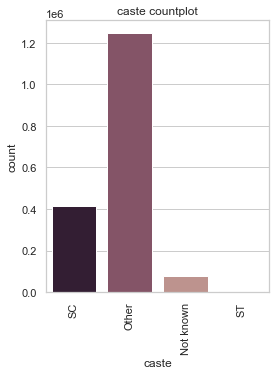

In [13]:
categorical_eda(df, 'caste', (4, 5))

### registration_date

Unique values: ['2018-04-09 00:00:00' '2018-04-02 00:00:00' '2018-04-04 00:00:00' ...
 '2020-06-10 00:00:00' '2020-06-24 00:00:00' '2020-05-27 00:00:00']
No. of unique values: 1155
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
2018-04-01 00:00:00    4.692310
2019-03-01 00:00:00    3.531847
2017-04-01 00:00:00    3.522892
2018-04-04 00:00:00    3.355209
2019-04-01 00:00:00    3.117261
                         ...   
2020-05-17 00:00:00    0.000057
2020-11-15 00:00:00    0.000057
2020-05-27 00:00:00    0.000057
2020-05-28 00:00:00    0.000057
2020-06-10 00:00:00    0.000057
Name: registration_date, Length: 1155, dtype: float64
Description: 
count        40.00000
mean      43549.45000
std       70193.32739
min           1.00000
25%       10704.75000
50%       17025.50000
75%       39217.25000
max      363339.00000
Name: id, dtype: float64


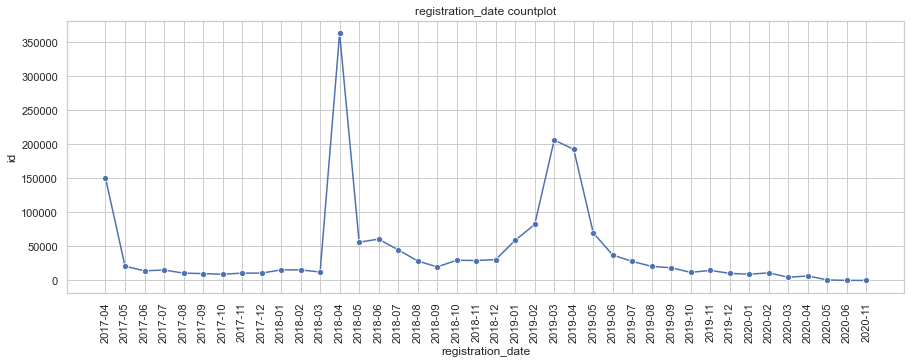

In [14]:
timeseries_eda(df, 'registration_date', (15, 5))

### mother_deleted

In [15]:
df['mother_deleted'].nunique()

2

Unique values: ['No' 'Yes']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
No     99.92032
Yes     0.07968
Name: mother_deleted, dtype: float64


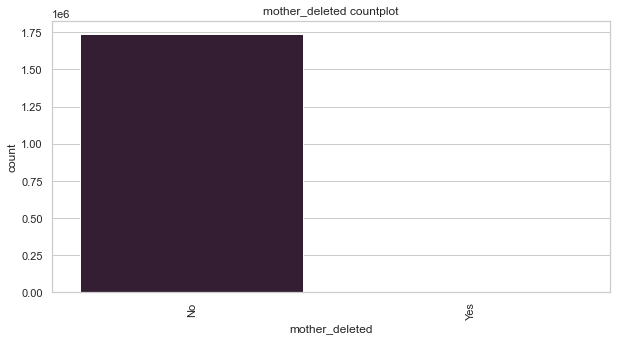

In [16]:
categorical_eda(df, 'mother_deleted', (10, 5))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741978 entries, 0 to 1741977
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

### mother_deleted_time

Unique values: [nan '2019-07-20 11:10:56' '2019-07-20 11:10:55' ... '2020-06-11 12:49:25'
 '2020-06-16 13:54:37' '2020-06-15 13:46:20']
No. of unique values: 1426
Missing values count: 1736698 / 1741978
Missing values %: 0.996968962868647
Value counts: 
2018-09-14 14:26:18    0.587121
2018-08-20 15:25:32    0.568182
2019-01-04 13:22:07    0.549242
2018-12-20 19:07:34    0.549242
2018-09-13 10:38:02    0.530303
                         ...   
2019-11-04 16:17:26    0.018939
2019-05-29 12:58:08    0.018939
2019-05-01 14:45:01    0.018939
2019-05-13 11:05:05    0.018939
2019-05-09 15:23:03    0.018939
Name: mother_deleted_time, Length: 1426, dtype: float64
Description: 
count     44.000000
mean     120.000000
std      105.886293
min        3.000000
25%       48.000000
50%       93.000000
75%      158.000000
max      522.000000
Name: id, dtype: float64


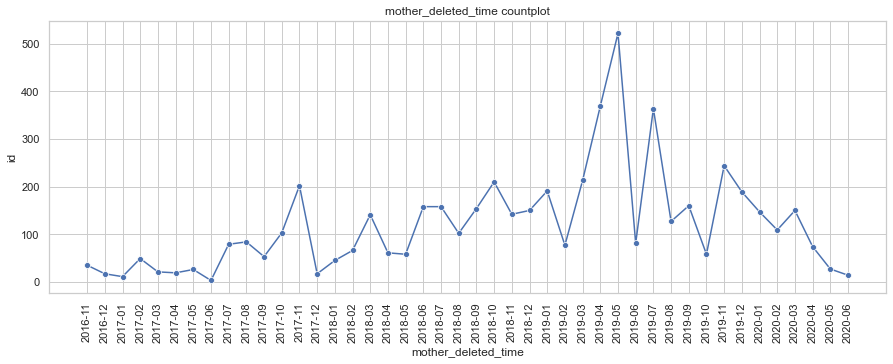

In [18]:
timeseries_eda(df, 'mother_deleted_time', (15, 5))

In [20]:
df[df['mother_deleted'] == 'Yes']['mother_deleted_time'].unique()

array(['2019-07-20 11:10:56', '2019-05-18 13:52:20',
       '2019-05-20 13:19:46', ..., '2020-06-11 12:49:25',
       '2020-06-16 13:54:37', '2020-06-15 13:46:20'], dtype=object)

In [21]:
df[df['mother_deleted'] == 'No']['mother_deleted_time'].unique()

array([nan, '2019-07-20 11:10:56', '2019-07-20 11:10:55',
       '2019-05-18 13:52:20', '2019-06-11 12:55:36',
       '2019-12-05 13:16:05', '2019-10-25 13:48:28',
       '2020-02-07 15:50:03', '2020-02-07 15:50:04',
       '2020-02-06 11:48:32', '2020-02-06 11:49:49',
       '2020-02-14 23:01:31', '2020-02-14 23:02:54',
       '2017-11-13 10:51:39', '2018-02-19 11:03:46',
       '2017-11-13 11:12:12', '2018-02-19 10:51:05',
       '2018-02-16 10:44:40', '2018-10-12 12:32:55',
       '2018-09-29 13:24:39', '2018-06-04 12:51:54',
       '2017-11-15 10:02:57', '2018-06-04 12:51:55',
       '2018-06-04 11:27:07', '2018-04-10 11:26:01',
       '2018-04-09 13:20:58', '2018-06-30 13:38:07',
       '2018-06-19 11:30:02', '2018-11-27 10:27:48',
       '2018-11-27 10:27:49', '2018-10-01 13:04:52',
       '2019-10-30 10:23:00', '2017-11-20 14:06:32',
       '2017-09-27 13:16:45', '2017-11-15 14:02:07',
       '2016-12-20 15:05:29', '2017-11-15 14:02:08',
       '2018-06-14 13:17:51', '2017-09-20

### female_child_born

Unique values: [ 0.  2.  1.  4.  3.  5.  6.  7.  9. 10. 14.  8. 12. 13. 11. 15.]
No. of unique values: 16
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     74.424935
1.0     16.637868
2.0      6.188769
3.0      1.913055
4.0      0.560971
5.0      0.172505
6.0      0.059300
7.0      0.018657
10.0     0.008266
8.0      0.007750
9.0      0.003617
12.0     0.001378
11.0     0.001033
14.0     0.000861
15.0     0.000574
13.0     0.000459
Name: female_child_born, dtype: float64


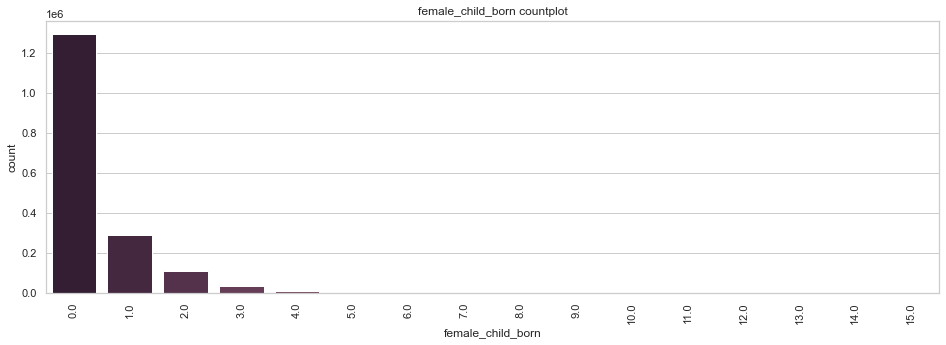

In [23]:
categorical_eda(df, 'female_child_born', (16, 5))

### female_child_live

Unique values: [ 0.  2.  1.  4.  3.  5.  6.  7.  9. 10.  8. 11.]
No. of unique values: 12
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     76.017148
1.0     15.784700
2.0      5.728029
3.0      1.748243
4.0      0.508502
5.0      0.150289
6.0      0.045925
7.0      0.011596
8.0      0.003904
9.0      0.001206
10.0     0.000344
11.0     0.000115
Name: female_child_live, dtype: float64


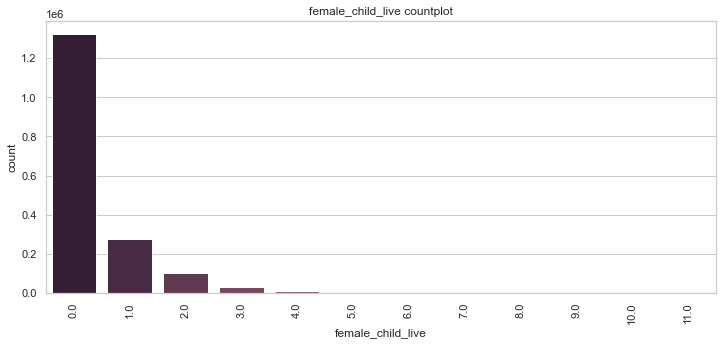

In [25]:
categorical_eda(df, 'female_child_live', (12, 5))

In [26]:
df[df['female_child_born'] == 0]['female_child_live'].unique()

array([0.])

### infertility_options

Unique values: ['Default' 'FRU' 'Others' 'District Hospital']
No. of unique values: 4
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Default              99.105901
FRU                   0.413323
Others                0.355228
District Hospital     0.125547
Name: infertility_options, dtype: float64


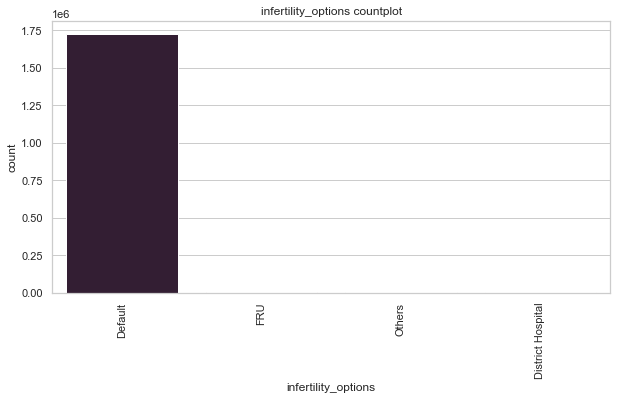

In [27]:
categorical_eda(df, 'infertility_options', (10, 5))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741978 entries, 0 to 1741977
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

### infertility_refer

In [29]:
categorical_eda(df, 'infertility_refer', (10, 5))

Unique values: [nan 'Civil Hospital Kalka' 'PhD pinjore' 'PhD Pinjore' 'PHC Pinjore'
 'pinjore' 'PHC pinjore' 'PHC  pinjore' 'GH PANCHKULA' 'Pgichd' 'PGI' 'GH'
 'hangola' 'PHC Hangola' 'General Hospital' 'Pgi chd' 'no'
 'COMMUNITY HEALTH CENTER' 'govt polyclinic' 'c h mandikhera'
 'ch mandikheta' 'CHC fpjhirka' 'phc' 'P H C' 'CHC Firojpur jhirka'
 'CHC Firoj Pur jhirka' 'CHC FP jhirka' 'CHC' 'awc' 'Subcenter'
 'Subcentre' 'nuh' 'Mandikhera' 'phx' 'MANDIKHERA' 'home' 'PHC HANGOLA'
 'hodal' 'CHChadal' 'CHC hodal' 'chc hodal' 'CHC Hodal' 'phc hodal'
 'sub center' 'sub' 'hofal' 'hodsl' 'su' 'horal' 'hodall' 'PhD dudola'
 'PhD dudhola' 'dudhola' 'yes' 'yesterday' 'yes listening' 'dhudhola'
 'dudhols' 'dufhola' 'didhola' 'dhoudhola' 'difhola' 'dudahola'
 'Gh palwal' 'Gh  palwal' 'phc Dudhola' 'Gh palwsl' 'Phc Dudhola'
 'Gh paleal' 'Phc dodhala' 'Phcdudhola' 'Gh pslwal' 'Phc dudhala'
 'Ghpslwal' 'Gh palwalwal' 'Ghpalwal' 'Phc dohola' 'Phc Dufhola'
 'Phc dudhola' 'GH palwal' 'G H PALWAL' 'Govt

KeyboardInterrupt: 

In [32]:
df[df['infertility_refer'].isna()]['infertility_options'].unique()

array(['Default', 'District Hospital', 'Others', 'FRU'], dtype=object)

### infertility_status

Unique values: ['N' 'Y']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
N    99.399074
Y     0.600926
Name: infertility_status, dtype: float64


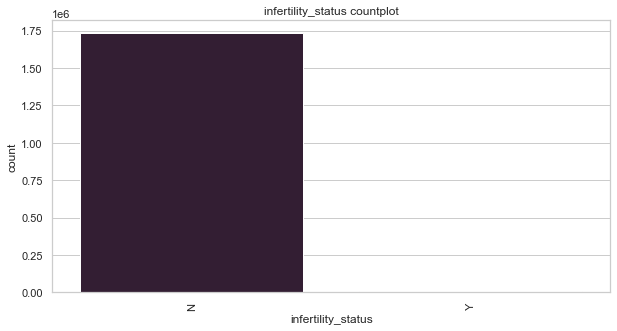

In [33]:
categorical_eda(df, 'infertility_status', (10, 5))

### male_child_born

Unique values: [ 0.  1.  2.  3.  5.  4. 10. 15.  9.  7. 14. 11.  6. 12.  8. 13.]
No. of unique values: 16
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     73.962013
1.0     19.459890
2.0      5.438071
3.0      0.804086
4.0      0.205169
5.0      0.068772
6.0      0.025029
10.0     0.010161
7.0      0.009874
8.0      0.004478
15.0     0.003387
9.0      0.003215
11.0     0.001894
13.0     0.001722
12.0     0.001320
14.0     0.000918
Name: male_child_born, dtype: float64


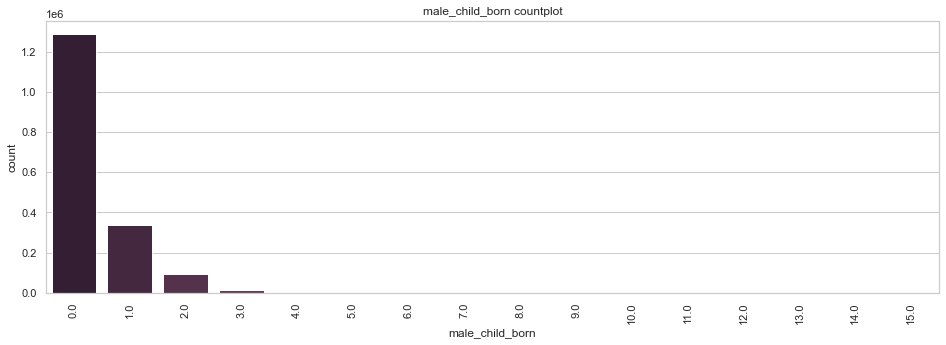

In [35]:
categorical_eda(df, 'male_child_born', (16, 5))

### male_child_live

Unique values: [ 0.  1.  2.  3.  4.  5.  7. 15.  6.  8.  9. 10. 11. 14. 12.]
No. of unique values: 15
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     75.675066
1.0     18.356432
2.0      4.984736
3.0      0.716484
4.0      0.184273
5.0      0.056717
6.0      0.017451
7.0      0.005970
8.0      0.001378
9.0      0.000804
15.0     0.000230
11.0     0.000172
10.0     0.000172
14.0     0.000057
12.0     0.000057
Name: male_child_live, dtype: float64


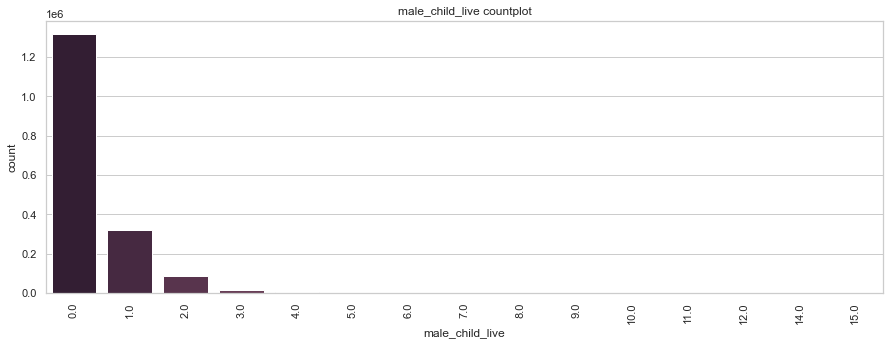

In [37]:
categorical_eda(df, 'male_child_live', (15, 5))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741978 entries, 0 to 1741977
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

### is_pregnant

Unique values: ['No' 'Yes' 'Not Known']
No. of unique values: 3
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
No           70.145605
Yes          29.786484
Not Known     0.067911
Name: is_pregnant, dtype: float64


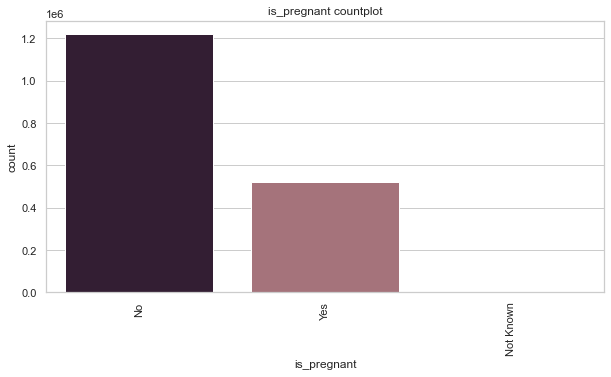

In [39]:
categorical_eda(df, 'is_pregnant', (10, 5))

### pregnancy_test_result

Unique values: [nan 'Test Not Done' 'Positive' 'Negative']
No. of unique values: 3
Missing values count: 1155053 / 1741978
Missing values %: 0.6630697976667903
Value counts: 
Positive         84.883077
Test Not Done    15.070239
Negative          0.046684
Name: pregnancy_test_result, dtype: float64


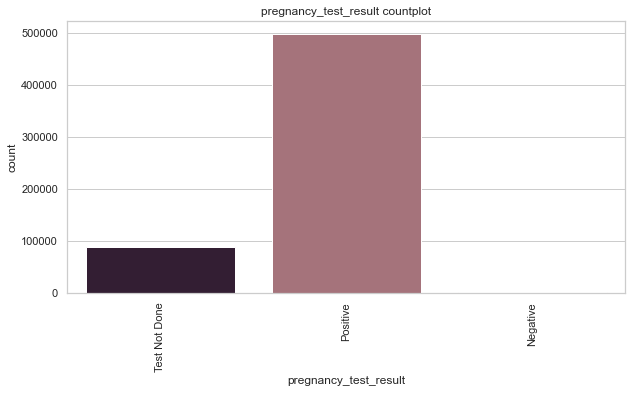

In [40]:
categorical_eda(df, 'pregnancy_test_result', (10, 5))

In [48]:
df[df['pregnancy_test_result'].isna()]['is_pregnant'].unique()

array(['No'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741978 entries, 0 to 1741977
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

#### Classifying columns into categorical, continous & others

In [56]:
for col in df:
	print(col, df[col].nunique())

id 1741978
state 1
district 12
poverty_line 3
case_no 5
caste 4
registration_date 1155
mother_deleted 2
mother_deleted_time 1426
female_child_born 16
female_child_live 12
infertility_options 4
infertility_refer 970
infertility_status 2
male_child_born 16
male_child_live 15
is_pregnant 3
pregnancy_test_result 3
pw_aadhaar_linked 3
re_reg_status 2
reason_for_deletion 408
registration_no 1609409
religion 6
rural_urban 2
wife_current_age 61
wife_marry_age 51
young_child_age_month 15
young_child_age_year 31
young_child_gender 3
hus_current_age 1
hus_marry_age 1
isactive 1
previous_status 0
created_on 523979


In [58]:
categorical_cols = []
continous_cols = []
for col in df:
	if df[col].nunique() <= 15:
		categorical_cols.append(col)
	else:
		continous_cols.append(col) 


In [60]:
timeseries_cols = ['registration_date', 'mother_deleted_time', 'created_on']
other_cols = ['id', 'infertility_refer', 'reason_for_deletion', 'registration_no']
continous_cols = list(set(continous_cols)- set(timeseries_cols) - set(other_cols))

In [61]:
continous_cols

['wife_current_age',
 'female_child_born',
 'young_child_age_year',
 'male_child_born',
 'wife_marry_age']

### Categorical columns

********************state********************
Unique values: ['Haryana']
No. of unique values: 1
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Haryana    100.0
Name: state, dtype: float64


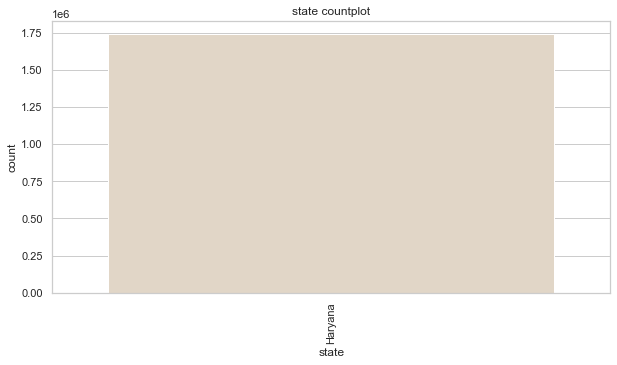

********************district********************
Unique values: ['Panchkula' 'Mewat' 'Palwal' 'Yamunanagar' 'Ambala' 'Mahendragarh'
 'Karnal' 'Gurgaon' 'Hisar' 'Jind' 'Sirsa' 'Kaithal']
No. of unique values: 12
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Karnal          14.037261
Jind            13.521239
Hisar           13.231510
Yamunanagar     11.369317
Kaithal          9.811720
Sirsa            8.207853
Ambala           8.207164
Mewat            7.327417
Gurgaon          3.992358
Mahendragarh     3.555613
Panchkula        3.436266
Palwal           3.302281
Name: district, dtype: float64


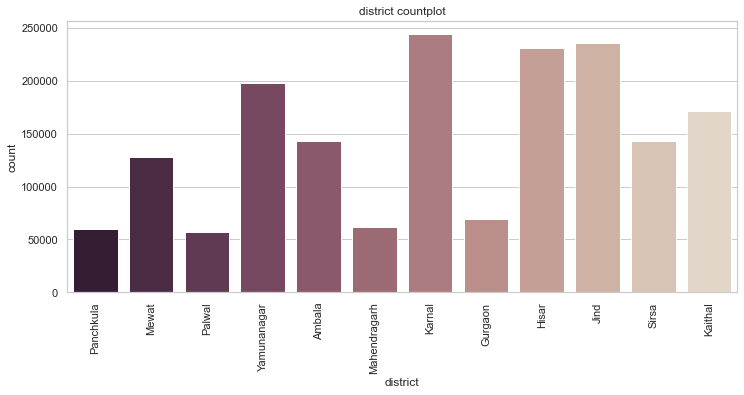

********************poverty_line********************
Unique values: ['Not known' 'APL' 'BPL']
No. of unique values: 3
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
APL          48.818010
Not known    37.124235
BPL          14.057755
Name: poverty_line, dtype: float64


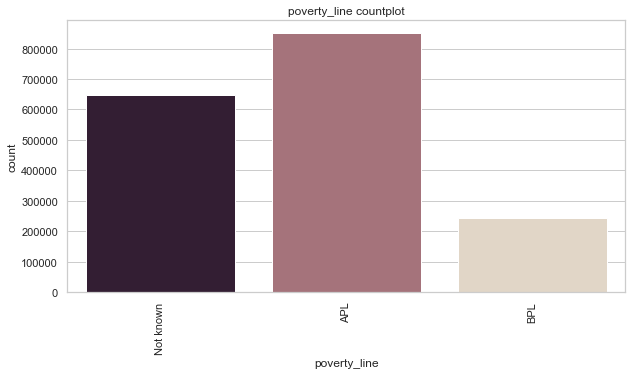

********************case_no********************
Unique values: [2. 1. 3. 4. 5.]
No. of unique values: 5
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
1.0    56.353008
2.0    43.059786
3.0     0.563842
4.0     0.022044
5.0     0.001320
Name: case_no, dtype: float64


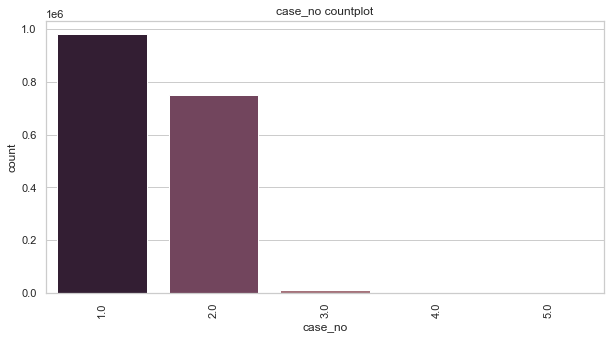

********************caste********************
Unique values: ['SC' 'Other' 'Not known' 'ST']
No. of unique values: 4
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Other        71.465311
SC           23.809658
Not known     4.342822
ST            0.382209
Name: caste, dtype: float64


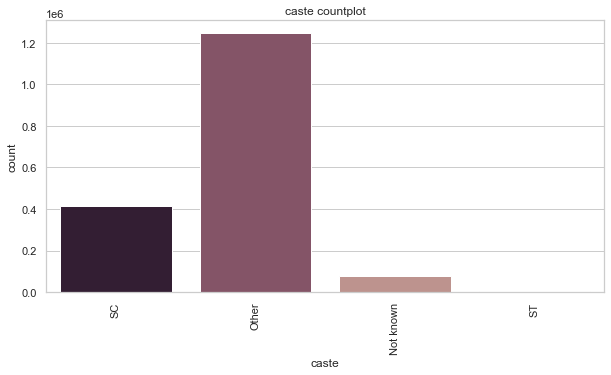

********************mother_deleted********************
Unique values: ['No' 'Yes']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
No     99.92032
Yes     0.07968
Name: mother_deleted, dtype: float64


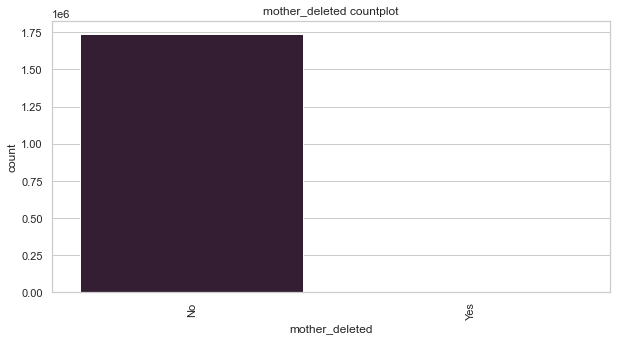

********************female_child_live********************
Unique values: [ 0.  2.  1.  4.  3.  5.  6.  7.  9. 10.  8. 11.]
No. of unique values: 12
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     76.017148
1.0     15.784700
2.0      5.728029
3.0      1.748243
4.0      0.508502
5.0      0.150289
6.0      0.045925
7.0      0.011596
8.0      0.003904
9.0      0.001206
10.0     0.000344
11.0     0.000115
Name: female_child_live, dtype: float64


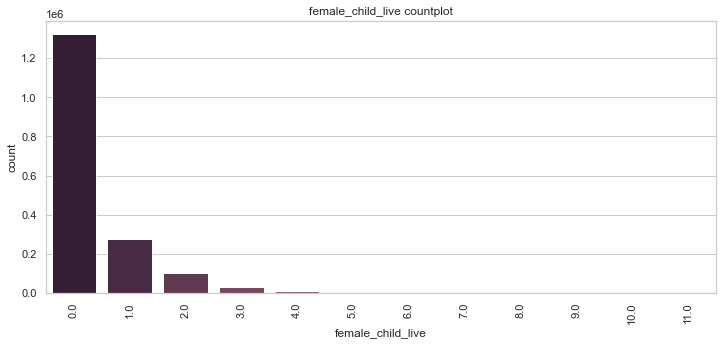

********************infertility_options********************
Unique values: ['Default' 'FRU' 'Others' 'District Hospital']
No. of unique values: 4
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Default              99.105901
FRU                   0.413323
Others                0.355228
District Hospital     0.125547
Name: infertility_options, dtype: float64


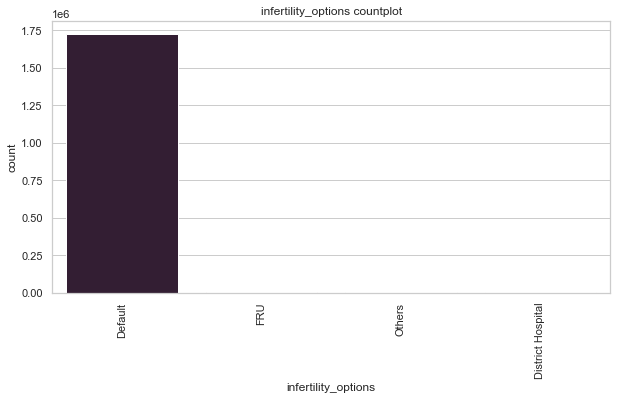

********************infertility_status********************
Unique values: ['N' 'Y']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
N    99.399074
Y     0.600926
Name: infertility_status, dtype: float64


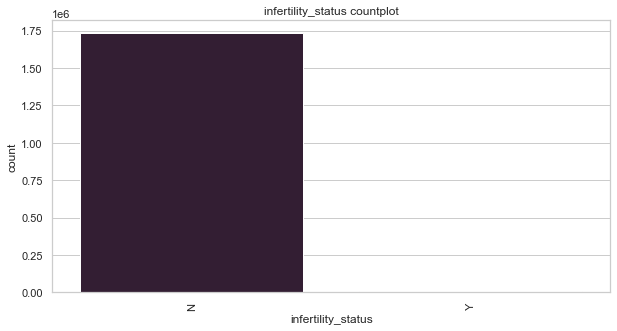

********************male_child_live********************
Unique values: [ 0.  1.  2.  3.  4.  5.  7. 15.  6.  8.  9. 10. 11. 14. 12.]
No. of unique values: 15
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     75.675066
1.0     18.356432
2.0      4.984736
3.0      0.716484
4.0      0.184273
5.0      0.056717
6.0      0.017451
7.0      0.005970
8.0      0.001378
9.0      0.000804
15.0     0.000230
11.0     0.000172
10.0     0.000172
14.0     0.000057
12.0     0.000057
Name: male_child_live, dtype: float64


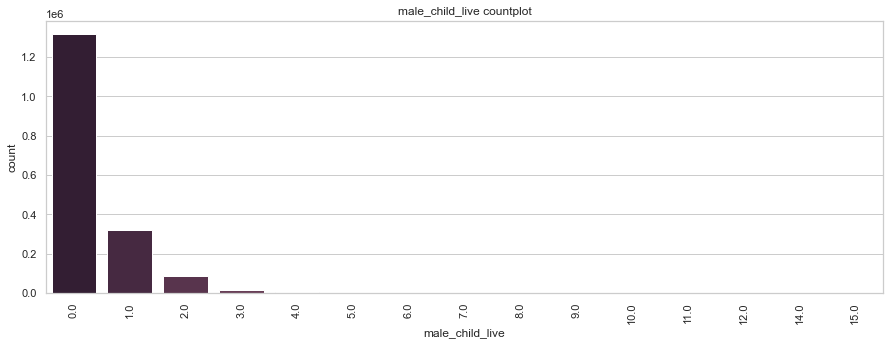

********************is_pregnant********************
Unique values: ['No' 'Yes' 'Not Known']
No. of unique values: 3
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
No           70.145605
Yes          29.786484
Not Known     0.067911
Name: is_pregnant, dtype: float64


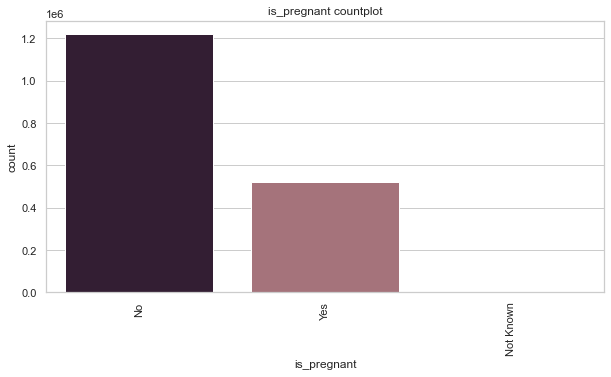

********************pregnancy_test_result********************
Unique values: [nan 'Test Not Done' 'Positive' 'Negative']
No. of unique values: 3
Missing values count: 1155053 / 1741978
Missing values %: 0.6630697976667903
Value counts: 
Positive         84.883077
Test Not Done    15.070239
Negative          0.046684
Name: pregnancy_test_result, dtype: float64


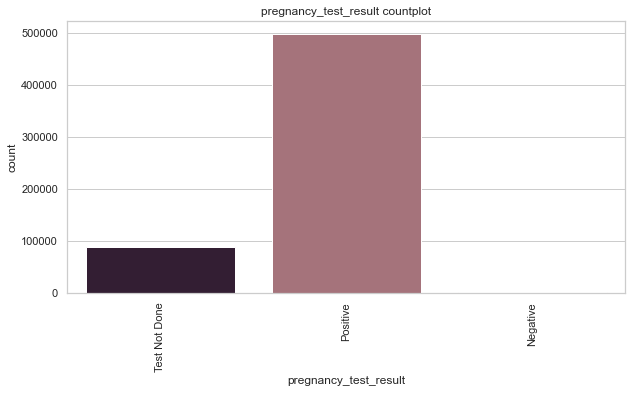

********************pw_aadhaar_linked********************
Unique values: ['Not known' 'No' 'Yes']
No. of unique values: 3
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
No           66.926218
Not known    31.073355
Yes           2.000427
Name: pw_aadhaar_linked, dtype: float64


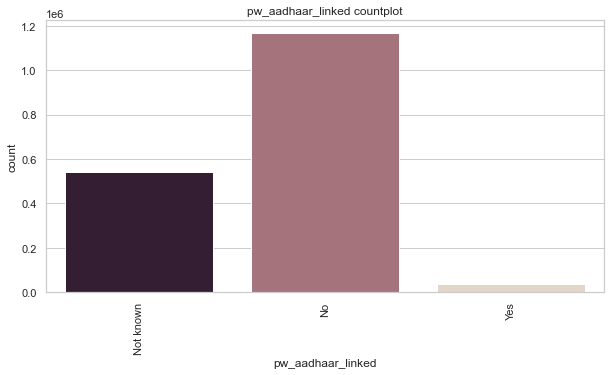

********************re_reg_status********************
Unique values: ['ReRegistrationDone' 'Eligible']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
ReRegistrationDone    79.606401
Eligible              20.393599
Name: re_reg_status, dtype: float64


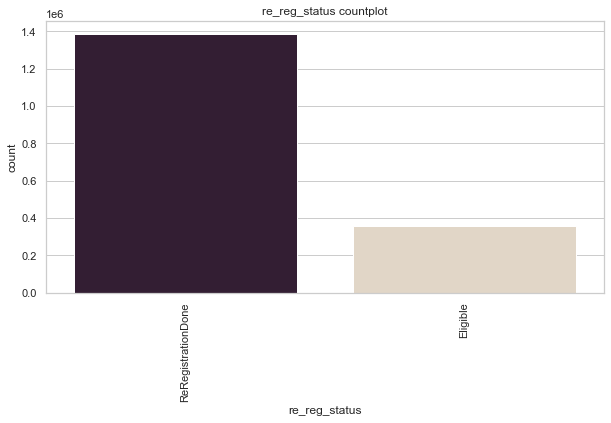

********************religion********************
Unique values: ['Not known' 'Hindu' 'Muslim' 'Other' 'Sikh' 'Christian']
No. of unique values: 6
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Hindu        54.056136
Not known    37.279231
Muslim        4.809131
Sikh          2.802332
Other         0.976074
Christian     0.077096
Name: religion, dtype: float64


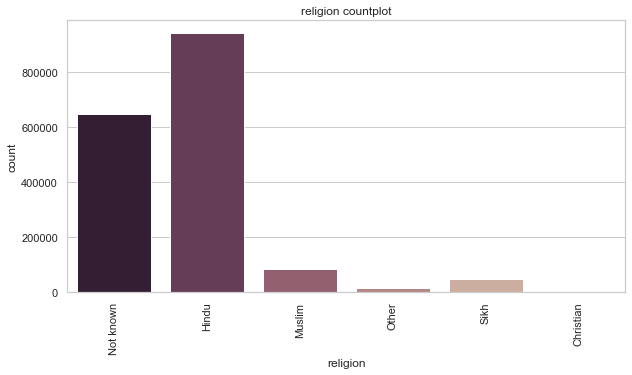

********************rural_urban********************
Unique values: ['Rural' 'Urban']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Rural    99.873649
Urban     0.126351
Name: rural_urban, dtype: float64


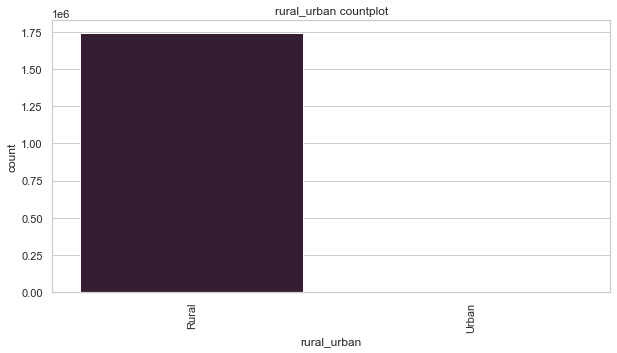

********************young_child_age_month********************
Unique values: [ 0.  1.  6.  8.  2. 10.  9.  7.  5.  4. 11.  3. 30. 20. 24.]
No. of unique values: 15
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
0.0     86.626639
6.0      5.215278
2.0      1.615922
1.0      1.357308
3.0      0.953858
5.0      0.945994
4.0      0.788816
9.0      0.636346
8.0      0.583417
10.0     0.537435
7.0      0.485023
11.0     0.253792
24.0     0.000057
20.0     0.000057
30.0     0.000057
Name: young_child_age_month, dtype: float64


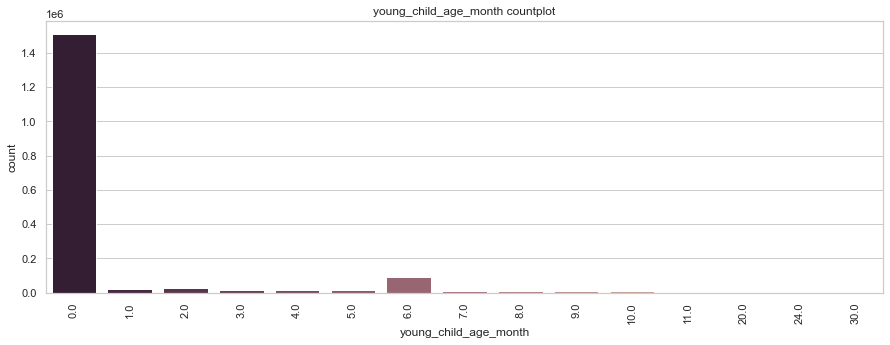

********************young_child_gender********************
Unique values: [nan 'F' '0' 'M']
No. of unique values: 3
Missing values count: 703706 / 1741978
Missing values %: 0.4039695105219469
Value counts: 
0    45.367592
M    29.309950
F    25.322459
Name: young_child_gender, dtype: float64


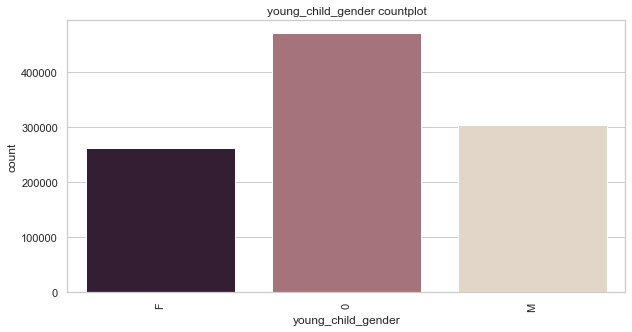

********************hus_current_age********************
Unique values: [nan  0.]
No. of unique values: 1
Missing values count: 1741529 / 1741978
Missing values %: 0.9997422470318225
Value counts: 
0.0    100.0
Name: hus_current_age, dtype: float64


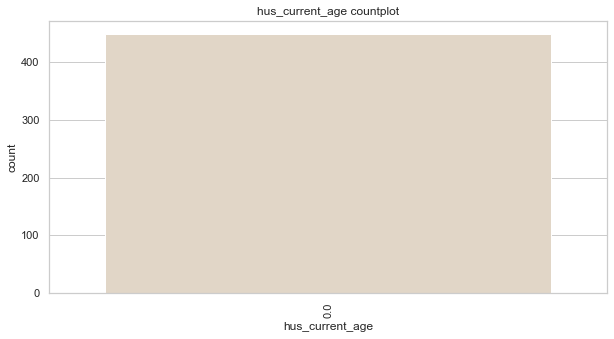

********************hus_marry_age********************
Unique values: [nan  0.]
No. of unique values: 1
Missing values count: 1741529 / 1741978
Missing values %: 0.9997422470318225
Value counts: 
0.0    100.0
Name: hus_marry_age, dtype: float64


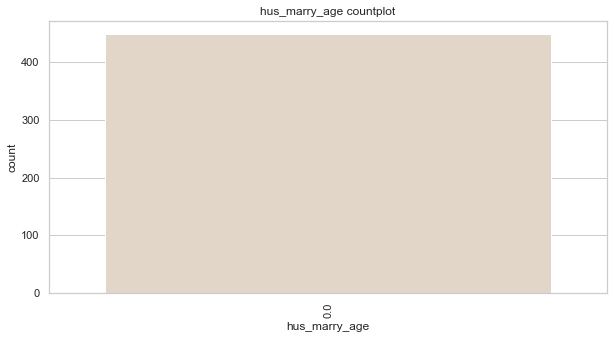

********************isactive********************
Unique values: [nan 't']
No. of unique values: 1
Missing values count: 1741977 / 1741978
Missing values %: 0.9999994259399373
Value counts: 
t    100.0
Name: isactive, dtype: float64


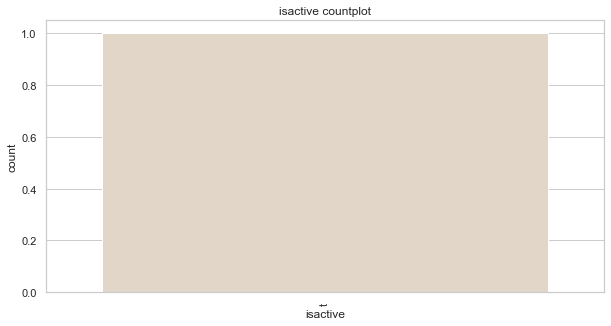

********************previous_status********************
Unique values: [nan]
No. of unique values: 0
Missing values count: 1741978 / 1741978
Missing values %: 1.0
Value counts: 
Series([], Name: previous_status, dtype: float64)


ValueError: min() arg is an empty sequence

<Figure size 720x360 with 0 Axes>

In [64]:
for col in categorical_cols:
	nunique = df[col].nunique()
	print('********************{}********************'.format(col))
	if nunique <= 10:
		categorical_eda(df, col, (10, 5))
	else:
		categorical_eda(df, col, (nunique, 5))

### Time-series EDA

********************registration_date********************
Unique values: ['2018-04-09 00:00:00' '2018-04-02 00:00:00' '2018-04-04 00:00:00' ...
 '2020-06-10 00:00:00' '2020-06-24 00:00:00' '2020-05-27 00:00:00']
No. of unique values: 1155
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
2018-04-01 00:00:00    4.692310
2019-03-01 00:00:00    3.531847
2017-04-01 00:00:00    3.522892
2018-04-04 00:00:00    3.355209
2019-04-01 00:00:00    3.117261
                         ...   
2020-05-17 00:00:00    0.000057
2020-11-15 00:00:00    0.000057
2020-05-27 00:00:00    0.000057
2020-05-28 00:00:00    0.000057
2020-06-10 00:00:00    0.000057
Name: registration_date, Length: 1155, dtype: float64
Description: 
count        40.00000
mean      43549.45000
std       70193.32739
min           1.00000
25%       10704.75000
50%       17025.50000
75%       39217.25000
max      363339.00000
Name: id, dtype: float64


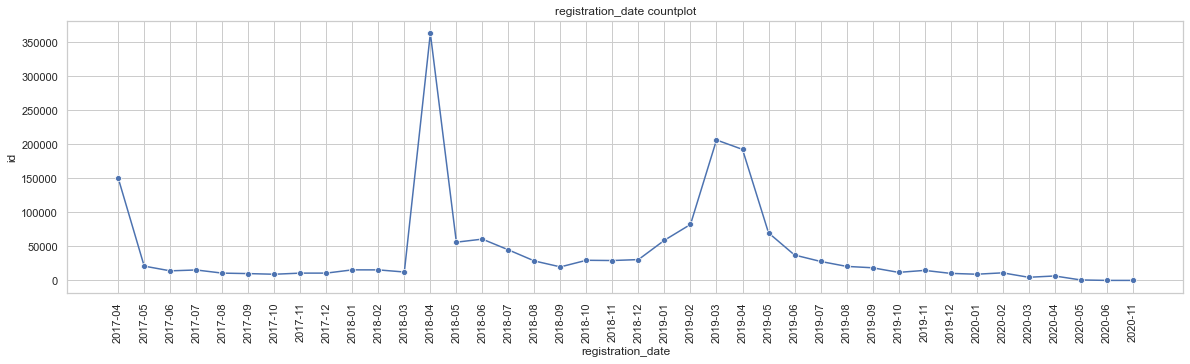

********************mother_deleted_time********************
Unique values: [nan '2019-07-20 11:10:56' '2019-07-20 11:10:55' ... '2020-06-11 12:49:25'
 '2020-06-16 13:54:37' '2020-06-15 13:46:20']
No. of unique values: 1426
Missing values count: 1736698 / 1741978
Missing values %: 0.996968962868647
Value counts: 
2018-09-14 14:26:18    0.587121
2018-08-20 15:25:32    0.568182
2019-01-04 13:22:07    0.549242
2018-12-20 19:07:34    0.549242
2018-09-13 10:38:02    0.530303
                         ...   
2019-11-04 16:17:26    0.018939
2019-05-29 12:58:08    0.018939
2019-05-01 14:45:01    0.018939
2019-05-13 11:05:05    0.018939
2019-05-09 15:23:03    0.018939
Name: mother_deleted_time, Length: 1426, dtype: float64
Description: 
count     44.000000
mean     120.000000
std      105.886293
min        3.000000
25%       48.000000
50%       93.000000
75%      158.000000
max      522.000000
Name: id, dtype: float64


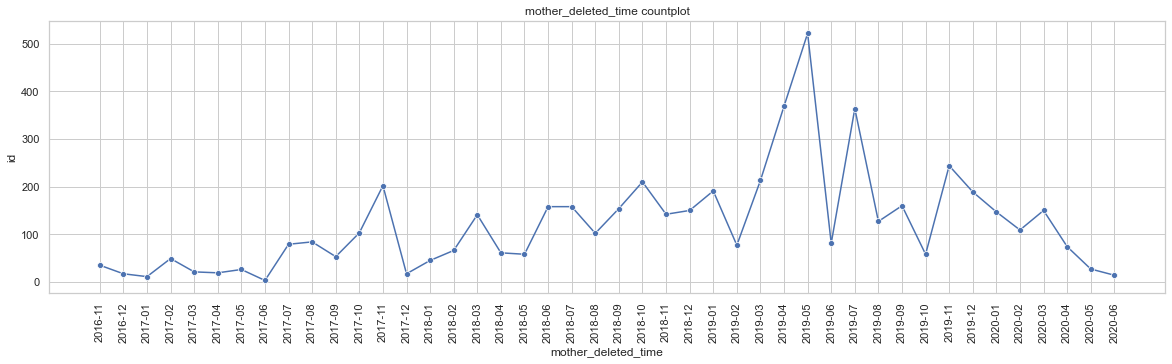

********************created_on********************
Unique values: ['2019-05-22 15:26:59' '2019-05-22 15:05:17' '2019-05-22 15:40:25' ...
 '2020-04-10 13:36:20' '2020-05-30 11:41:59' '2020-05-26 13:49:13']
No. of unique values: 523979
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
2019-03-26 10:30:00    0.003502
2019-01-31 14:58:00    0.003157
2019-05-24 13:18:00    0.003100
2019-03-27 11:57:36    0.003043
2019-01-26 19:33:00    0.003043
                         ...   
2016-12-20 13:01:54    0.000057
2020-01-10 14:23:21    0.000057
2018-06-07 10:07:33    0.000057
2018-10-22 12:06:56    0.000057
2020-05-16 15:46:00    0.000057
Name: created_on, Length: 523979, dtype: float64
Description: 
count        98.000000
mean      17775.285714
std       47740.899985
min           1.000000
25%           5.000000
50%         183.500000
75%       23636.250000
max      417762.000000
Name: id, dtype: float64


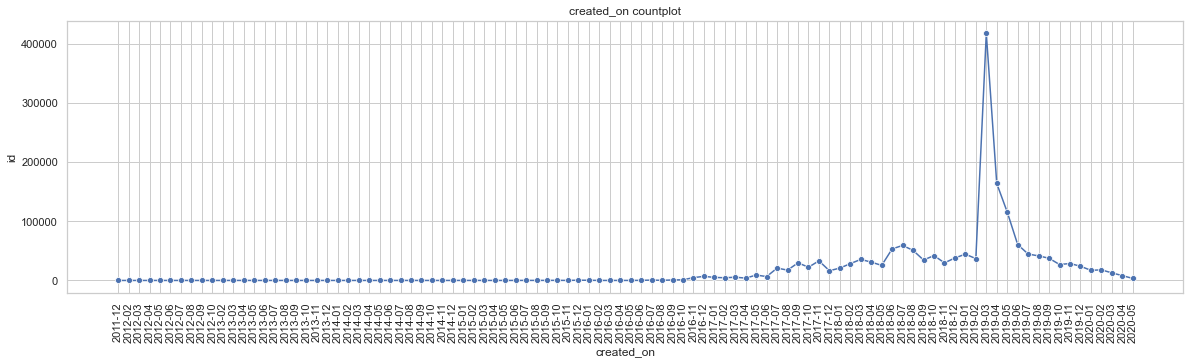

In [66]:
for col in timeseries_cols:
	nunique = df[col].nunique()
	print('********************{}********************'.format(col))
	timeseries_eda(df, col, (20, 5))
	

In [69]:
df[pd.to_datetime(df['created_on']).dt.year == 2011]

,id,state,district,poverty_line,case_no,caste,registration_date,mother_deleted,mother_deleted_time,female_child_born,...,wife_current_age,wife_marry_age,young_child_age_month,young_child_age_year,young_child_gender,hus_current_age,hus_marry_age,isactive,previous_status,created_on
72583,72582,Haryana,Mewat,APL,1.0,Other,2019-05-20 00:00:00,No,NaN,0.0,...,30.0,18.0,0.0,0.0,0,NaN,NaN,NaN,NaN,2011-12-13 11:30:16
72584,72583,Haryana,Mewat,BPL,1.0,Other,2019-05-20 00:00:00,No,NaN,0.0,...,31.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,2011-12-13 11:50:24
72640,72639,Haryana,Mewat,BPL,1.0,Other,2019-04-10 00:00:00,No,NaN,0.0,...,35.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,2011-12-19 10:35:02


### Continous EDA

In [71]:
continous_cols

['wife_current_age',
 'female_child_born',
 'young_child_age_year',
 'male_child_born',
 'wife_marry_age']

********************wife_current_age********************
Missing values count: 0 / 1741978
Missing values %: 0.0
Descriptive stats: 
count   1741978.000
mean         27.567
std           5.099
min           2.000
25%          24.000
50%          27.000
75%          30.000
max         139.000
Name: wife_current_age, dtype: float64


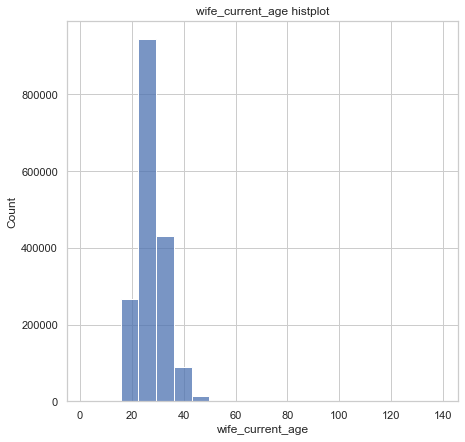

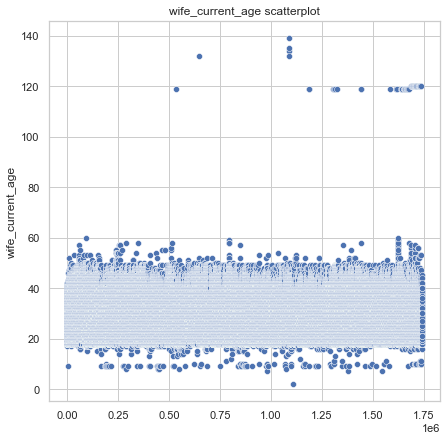

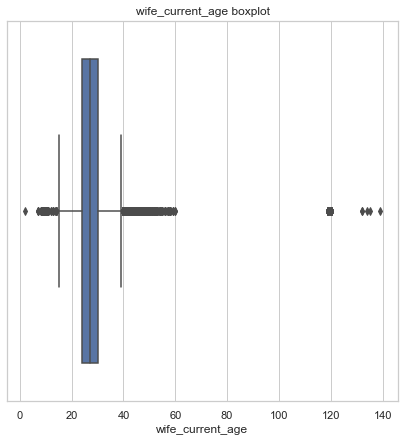

********************female_child_born********************
Missing values count: 0 / 1741978
Missing values %: 0.0
Descriptive stats: 
count   1741978.000
mean          0.386
std           0.790
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          15.000
Name: female_child_born, dtype: float64


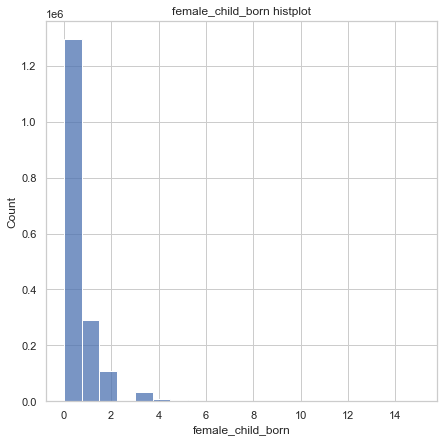

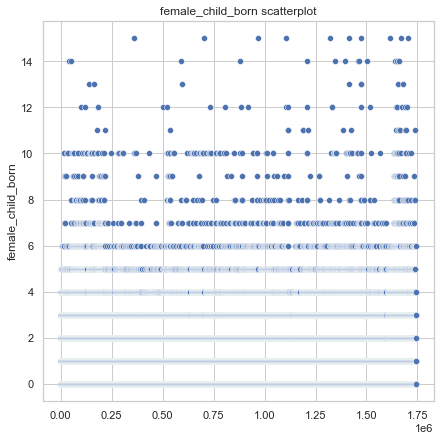

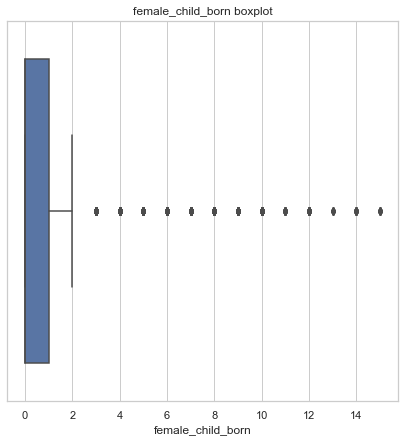

********************young_child_age_year********************
Missing values count: 0 / 1741978
Missing values %: 0.0
Descriptive stats: 
count   1741978.000
mean          1.534
std           3.379
min           0.000
25%           0.000
50%           0.000
75%           2.000
max          30.000
Name: young_child_age_year, dtype: float64


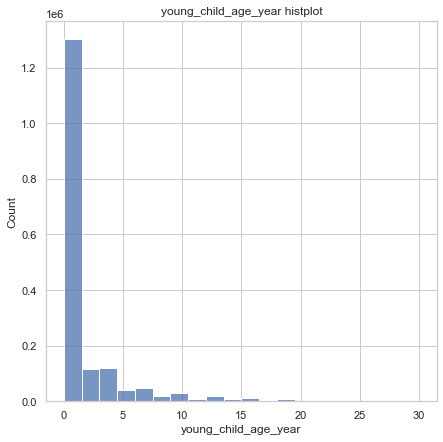

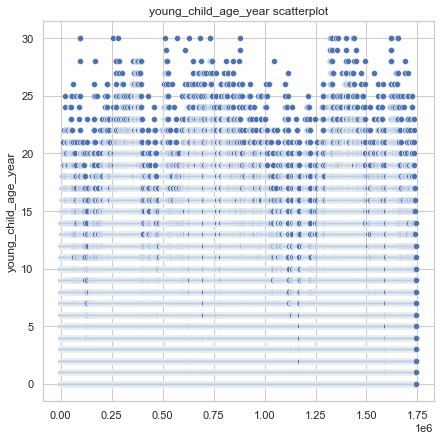

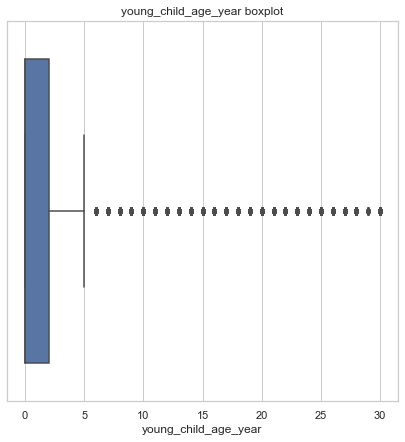

********************male_child_born********************
Missing values count: 0 / 1741978
Missing values %: 0.0
Descriptive stats: 
count   1741978.000
mean          0.344
std           0.680
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          15.000
Name: male_child_born, dtype: float64


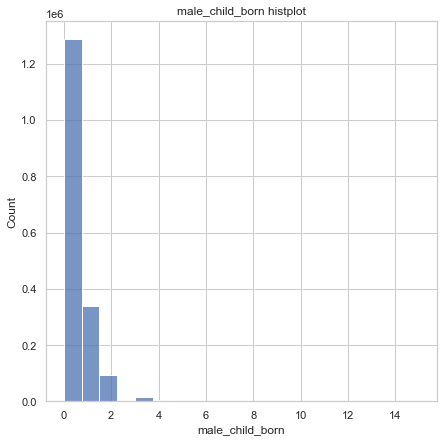

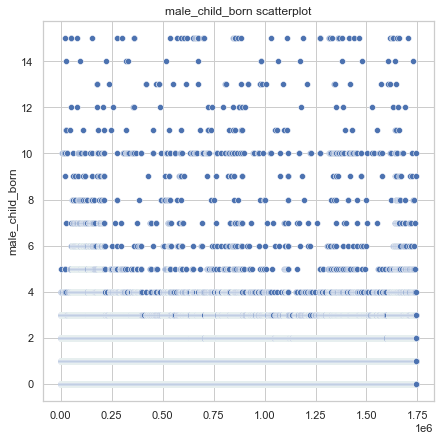

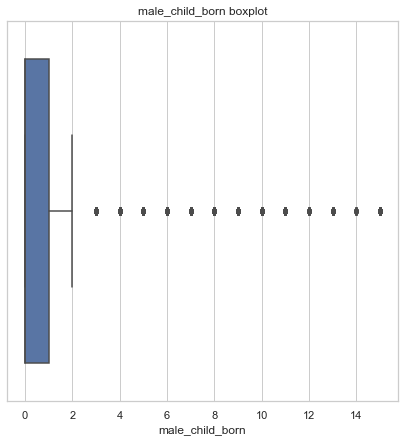

********************wife_marry_age********************
Missing values count: 549781 / 1741978
Missing values %: 0.3156073153621917
Descriptive stats: 
count   1192197.000
mean         17.725
std           7.298
min           0.000
25%          18.000
50%          20.000
75%          21.000
max          56.000
Name: wife_marry_age, dtype: float64


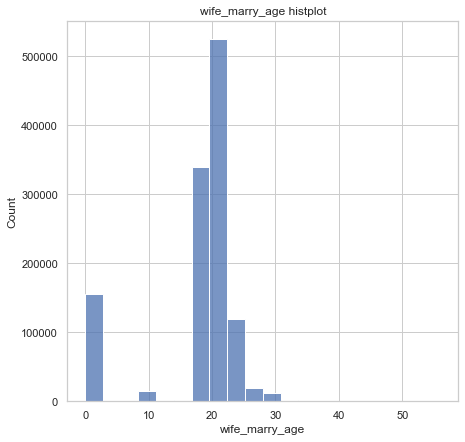

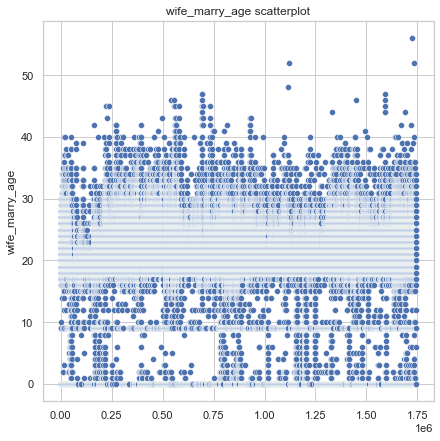

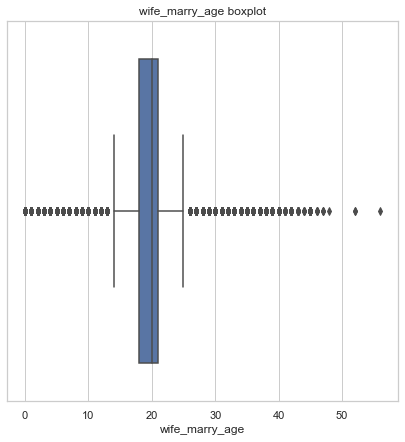

In [80]:
for col in continous_cols:
	print('********************{}********************'.format(col))
	continous_eda(df, col, (7, 7))